In [49]:
%%capture
%run ch4_linear_algebra.ipynb

In [50]:
# Derivative (limit of the difference quotients as h approches zero)

from typing import Callable

def difference_quotient(f: Callable[[float], float], 
                        x: float, 
                        h: float) -> float:
    
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative_of_square(x: float) -> float:
    return 2 * x

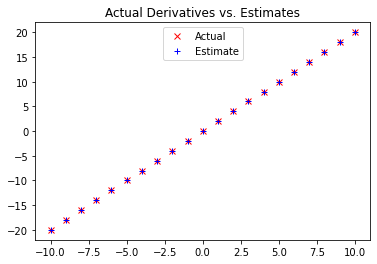

In [51]:
# Estimating derivative (y = x^2)

xs = range(-10, 11)
actuals = [derivative_of_square(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

# print(actuals)
# print(estimates)

# plot to show they are basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [52]:
# Partial derivative

def partial_difference_quotient(f: Callable[[Vector], float], 
                       v: Vector, 
                       i: int, 
                       h: float) -> float:
    
    """Returns the i-th partial difference quotient of f at v"""
    
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
   
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float], 
                      v: Vector, 
                      h: float = 0.0001) -> float:
    
    return [partial_difference_quotient(f, v, i, h) 
            for i in range(len(v))]

In [53]:
# Using gradients to find the minimum among the given 3D vectors

import random

def gradient_step(v: Vector, 
                  gradient: Vector, 
                  step_size: float) -> Vector:
    
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, grad, v)
    
assert distance(v, [0, 0, 0]) < 0.001 # v should close to zero

0 [17.68831772403214, -13.818792874029317, -7.7703577400865065] [8.667275684775747, -6.771208508274365, -3.8074752926423883]
1 [17.334551369551495, -13.54241701654873, -7.6149505852847765] [8.493930171080232, -6.635784338108878, -3.7313257867895406]
2 [16.987860342160463, -13.271568676217756, -7.462651573579081] [8.324051567658627, -6.5030686513467, -3.65669927105375]
3 [16.648103135317253, -13.0061373026934, -7.3133985421075] [8.157570536305455, -6.373007278319766, -3.583565285632675]
4 [16.31514107261091, -12.746014556639532, -7.16713057126535] [7.994419125579346, -6.24554713275337, -3.5118939799200213]
5 [15.988838251158692, -12.49109426550674, -7.023787959840043] [7.834530743067758, -6.120636190098303, -3.441656100321621]
6 [15.669061486135517, -12.241272380196605, -6.883312200643242] [7.6778401282064035, -5.998223466296337, -3.3728229783151886]
7 [15.355680256412807, -11.996446932592674, -6.745645956630377] [7.524283325642275, -5.87825899697041, -3.305366518748885]
8 [15.048566651

510 [0.0005929050286423374, -0.00046320017045189173, -0.00026045914881932627] [0.00029052346403474536, -0.00022696808352142694, -0.00012762498292146987]
511 [0.0005810469280694907, -0.0004539361670428539, -0.00025524996584293973] [0.00028471299475405046, -0.0002224287218509984, -0.00012507248326304048]
512 [0.0005694259895081009, -0.0004448574437019968, -0.00025014496652608095] [0.00027901873485896943, -0.00021798014741397843, -0.00012257103359777967]
513 [0.0005580374697179389, -0.00043596029482795685, -0.00024514206719555934] [0.00027343836016179, -0.00021362054446569885, -0.00012011961292582407]
514 [0.00054687672032358, -0.0004272410889313977, -0.00024023922585164815] [0.00026796959295855423, -0.00020934813357638486, -0.0001177172206673076]
515 [0.0005359391859171085, -0.0004186962671527697, -0.0002354344413346152] [0.00026261020109938317, -0.00020516117090485717, -0.00011536287625396145]
516 [0.0005252204021987663, -0.00041032234180971434, -0.0002307257525079229] [0.00025735799707

844 [6.958160065929973e-07, -5.435981772579209e-07, -3.056672418971846e-07] [3.4094984323056867e-07, -2.6636310685638123e-07, -1.4977694852962045e-07]
845 [6.818996864611373e-07, -5.327262137127625e-07, -2.995538970592409e-07] [3.341308463659573e-07, -2.610358447192536e-07, -1.4678140955902806e-07]
846 [6.682616927319146e-07, -5.220716894385072e-07, -2.935628191180561e-07] [3.2744822943863815e-07, -2.5581512782486856e-07, -1.4384578136784749e-07]
847 [6.548964588772763e-07, -5.116302556497371e-07, -2.8769156273569497e-07] [3.2089926484986537e-07, -2.506988252683712e-07, -1.4096886574049053e-07]
848 [6.417985296997307e-07, -5.013976505367424e-07, -2.8193773148098106e-07] [3.1448127955286807e-07, -2.4568484876300376e-07, -1.3814948842568072e-07]
849 [6.289625591057361e-07, -4.913696975260075e-07, -2.7629897685136144e-07] [3.081916539618107e-07, -2.4077115178774366e-07, -1.353864986571671e-07]
850 [6.163833079236214e-07, -4.815423035754873e-07, -2.707729973143342e-07] [3.020278208825745e-

In [54]:
# Using gradients to fit the model


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta # model parameters
    predicted = slope * x + intercept # prediction of the model
    error = (predicted - y)
    
    squared_error = error ** 2 # we will minimize squared error
    grad = [2 * error * x, 2 * error]
    
    return grad

inputs = [(x, 20 * x + 5) for x in range (-50, 50)] # y = 20x + 5

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients (gradient of the mean squared error)
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    if epoch % 10 == 0:
        print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.41864418941107, -0.1699189810483803]
10 [20.230883295409654, -0.05971585733459454]
20 [20.001098362713645, 0.04067796640444922]
30 [19.99715150645013, 0.13894957693506174]
40 [19.997139540693585, 0.23527161349001144]
50 [19.99719502859101, 0.32968498294565535]
60 [19.997250588482245, 0.42222754531772083]
70 [19.99730506786843, 0.5129363714481773]
80 [19.99735846809828, 0.6018477969388296]
90 [19.997410810205682, 0.6889974373875909]
100 [19.997462115151304, 0.7744202026670339]
110 [19.99751240348646, 0.8581503109085825]
120 [19.997561695355348, 0.9402213022094057]
130 [19.997610010503, 1.0206660520677064]
140 [19.997657368283207, 1.0995167845517877]
150 [19.997703787666254, 1.176805085208174]
160 [19.997749287246542, 1.2525619137139579]
170 [19.99779388525001, 1.3268176162784375]
180 [19.997837599541466, 1.399601937799019]
190 [19.9978804476317, 1.4709440337762434]
200 [19.997922446684548, 1.5408724819927222]
210 [19.997963613523734, 1.6094152939606499]
220 [19.998003964639615, 1.

2140 [19.9999572132486, 4.928760033219663]
2150 [19.999958061070554, 4.930171657284461]
2160 [19.99995889209287, 4.931555309936718]
2170 [19.99995970664843, 4.9329115454315895]
2180 [19.99996050506352, 4.934240907041638]
2190 [19.99996128765797, 4.935543927274445]
2200 [19.99996205474527, 4.936821128085927]
2210 [19.99996280663269, 4.938073021089412]
2220 [19.999963543621416, 4.939300107760578]
2230 [19.999964266006664, 4.940502879638335]
2240 [19.999964974077812, 4.941681818521725]
2250 [19.999965668118488, 4.942837396662909]
2260 [19.999966348406705, 4.9439700769563455]
2270 [19.999967015214978, 4.9450803131242145]
2280 [19.9999676688104, 4.946168549898161]
2290 [19.999968309454793, 4.947235223197449]
2300 [19.99996893740478, 4.948280760303577]
2310 [19.999969552911903, 4.949305580031437]
2320 [19.999970156222716, 4.950310092897077]
2330 [19.99997074757889, 4.951294701282148]
2340 [19.999971327217306, 4.952259799595083]
2350 [19.999971895370155, 4.953205774429093]
2360 [19.9999724522

3980 [19.999998923569027, 4.998207741785491]
3990 [19.99999894489857, 4.99824325548574]
4000 [19.999998965805467, 4.998278065479961]
4010 [19.99999898629809, 4.998312185712134]
4020 [19.999999006384655, 4.998345629849933]
4030 [19.999999026073198, 4.998378411290203]
4040 [19.999999045371613, 4.998410543164337]
4050 [19.999999064287632, 4.998442038343527]
4060 [19.999999082828825, 4.998472909443916]
4070 [19.999999101002626, 4.9985031688316655]
4080 [19.99999911881631, 4.998532828627896]
4090 [19.999999136277015, 4.998561900713546]
4100 [19.999999153391737, 4.998590396734137]
4110 [19.99999917016733, 4.998618328104433]
4120 [19.999999186610513, 4.99864570601301]
4130 [19.99999920272787, 4.998672541426742]
4140 [19.999999218525865, 4.998698845095198]
4150 [19.999999234010822, 4.998724627554942]
4160 [19.99999924918894, 4.998749899133755]
4170 [19.999999264066304, 4.998774669954771]
4180 [19.999999278648875, 4.998798949940534]
4190 [19.999999292942487, 4.998822748816973]
4200 [19.99999930

In [55]:
# Minibatch gradient descent

from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to type generic functions

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    
    # start index 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: 
        random.shuffle(batch_starts) # shuffle the batches
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]
        
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs]) # Compute the mean of the gradients
        theta = gradient_step(theta, grad, -learning_rate) # Take a step in that direction
    
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [22.524314291268677, 0.36085382475555605]
1 [19.663621285802652, 0.408749308472887]
2 [20.04131361406463, 0.4542400241797157]
3 [19.99148247018145, 0.4995322963130362]
4 [19.99809155019918, 0.5443399887062343]
5 [19.99724923574904, 0.5887059621731784]
6 [19.99739033421406, 0.6326295935663354]
7 [19.997401307377444, 0.6761159502407886]
8 [19.997429164606533, 0.7191692986693164]
9 [19.997454501043848, 0.7617939619122936]
10 [19.99747988137342, 0.8039942069060773]
11 [19.997504969888936, 0.8457742598273474]
12 [19.997529813757396, 0.8871383045443698]
13 [19.997554409571503, 0.9280904832963048]
14 [19.99757876057257, 0.9686348970736474]
15 [19.997602869096383, 1.00877560603344]
16 [19.997626737570766, 1.0485166299052635]
17 [19.997650368384132, 1.087861948393855]
18 [19.997673763903133, 1.1268155015776282]
19 [19.997696926470592, 1.1653811903032396]
20 [19.997719858406025, 1.2035628765762214]
21 [19.997742562005865, 1.2413643839477277]
22 [19.997765039543673, 1.2787894978974277]
23 [19.9

207 [19.99964903622531, 4.415645104354131]
208 [19.999652530807015, 4.421463584991948]
209 [19.999655990592817, 4.427224130431164]
210 [19.999659415929184, 4.432927317538396]
211 [19.999662807159133, 4.4385737174363395]
212 [19.999666164622262, 4.444163895560967]
213 [19.99966948865479, 4.449698411718146]
214 [19.99967277958959, 4.4551778201397]
215 [19.999676037756224, 4.460602669538911]
216 [19.99967926348096, 4.4659735031654675]
217 [19.999682457086834, 4.471290858859868]
218 [19.999685618893647, 4.476555269107276]
219 [19.999688749218034, 4.481767261090847]
220 [19.999691848373466, 4.4869273567445225]
221 [19.999694916670293, 4.492036072805292]
222 [19.999697954415783, 4.4970939208649465]
223 [19.99970096191413, 4.5021014074213035]
224 [19.999703939466514, 4.507059033928931]
225 [19.999706887371108, 4.511967296849363]
226 [19.999709805923118, 4.516826687700816]
227 [19.99971269541481, 4.5216376931074125]
228 [19.99971555613555, 4.5264007948479055]
229 [19.999718388371797, 4.5311164

419 [19.999957935754964, 4.929963006753592]
420 [19.9999583545929, 4.930660372159738]
421 [19.999958769260417, 4.931350793828194]
422 [19.99995917979905, 4.932034340898456]
423 [19.999959586249908, 4.932711081821593]
424 [19.999959988653693, 4.933381084367098]
425 [19.999960387050702, 4.934044415629676]
426 [19.999960781480834, 4.934701142035965]
427 [19.999961171983585, 4.9353513293511835]
428 [19.999961558598063, 4.935995042685723]
429 [19.999961941362976, 4.936632346501661]
430 [19.999962320316666, 4.937263304619221]
431 [19.999962695497075, 4.937887980223162]
432 [19.99996306694177, 4.938506435869106]
433 [19.99996343468796, 4.939118733489802]
434 [19.99996379877246, 4.939724934401328]
435 [19.999964159231734, 4.940325099309233]
436 [19.999964516101876, 4.940919288314613]
437 [19.99996486941863, 4.941507560920133]
438 [19.999965219217373, 4.942089976035982]
439 [19.999965565533135, 4.942666591985777]
440 [19.999965908400593, 4.9432374665123975]
441 [19.99996624785409, 4.94380265678

657 [19.999996113414294, 4.993528832465167]
658 [19.99999615211342, 4.993593266533036]
659 [19.999996190427215, 4.993657059024391]
660 [19.999996228359514, 4.993720216327476]
661 [19.99999626591412, 4.993782744766922]
662 [19.999996303094786, 4.993844650604392]
663 [19.99999633990525, 4.993905940039194]
664 [19.99999637634918, 4.99396661920891]
665 [19.999996412430235, 4.994026694190014]
666 [19.999996448152032, 4.994086170998471]
667 [19.999996483518142, 4.994145055590347]
668 [19.999996518532104, 4.994203353862401]
669 [19.99999655319743, 4.994261071652682]
670 [19.999996587517593, 4.994318214741103]
671 [19.999996621496024, 4.9943747888500285]
672 [19.99999665513613, 4.994430799644843]
673 [19.999996688441275, 4.994486252734525]
674 [19.9999967214148, 4.994541153672199]
675 [19.999996754060003, 4.994595507955701]
676 [19.999996786380155, 4.994649321028119]
677 [19.99999681837849, 4.994702598278348]
678 [19.999996850058217, 4.994755345041622]
679 [19.999996881422508, 4.99480756660005

849 [19.999999430965246, 4.999052556795544]
850 [19.99999943663118, 4.999061990583097]
851 [19.999999442240703, 4.999071330437474]
852 [19.999999447794373, 4.99908057729398]
853 [19.999999453292737, 4.999089732078604]
854 [19.999999458736355, 4.999098795708113]
855 [19.99999946412577, 4.999107769090149]
856 [19.999999469461528, 4.999116653123315]
857 [19.99999947474415, 4.999125448697266]
858 [19.999999479974175, 4.999134156692801]
859 [19.999999485152127, 4.9991427779819455]
860 [19.99999949027852, 4.999151313428044]
861 [19.99999949535387, 4.999159763885844]
862 [19.999999500378678, 4.999168130201584]
863 [19.99999950535346, 4.999176413213074]
864 [19.999999510278705, 4.999184613749784]
865 [19.99999951515491, 4.999192732632923]
866 [19.99999951998256, 4.999200770675524]
867 [19.999999524762146, 4.9992087286825235]
868 [19.999999529494136, 4.999216607450844]
869 [19.99999953417901, 4.999224407769474]
870 [19.999999538817235, 4.999232130419544]
871 [19.999999543409277, 4.9992397761744

In [56]:
# Stochastic gradient descent

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate) # take gradient steps based on one training example at a time
    
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.08798400071417, 0.6208564929186413]
1 [20.084208515390728, 0.8087382405066615]
2 [20.080595652229537, 0.9885591415167438]
3 [20.0771377845635, 1.1606650489872696]
4 [20.07382827901951, 1.3253869651207582]
5 [20.070660782824763, 1.4830416914535833]
6 [20.067629159678877, 1.6339324368568737]
7 [20.064727620732985, 1.7783494014632228]
8 [20.061950572579608, 1.9165703351766747]
9 [20.05929264188212, 2.0488610705395027]
10 [20.056748769559245, 2.175476035323627]
11 [20.05431404314983, 2.29665874197087]
12 [20.051983757073902, 2.4126422544836363]
13 [20.049753450851696, 2.5236496375476647]
14 [20.047618859752998, 2.6298943864198296]
15 [20.045575832530897, 2.731580836161397]
16 [20.043620453361672, 2.8289045544835982]
17 [20.041748964515907, 2.922052718819225]
18 [20.039957774691455, 3.0112044762154477]
19 [20.03824343857176, 3.096531287773025]
20 [20.036602645526788, 3.178197257975232]
21 [20.035032254652773, 3.256359450662542]
22 [20.033529237266393, 3.3311681911477593]
23 [20.032090